在了解了线性回归的背景知识之后，我们现在可以手动实现它了。尽管强大的深度学习框架可以减少大量重复性工作，但若过于依赖它提供的便利，会导致我们很难深入理解深度学习是如何工作的。因此，本节将介绍如何只使用`Tensor`和`autograd`来实现一个线性回归的训练

首先，导入本节实验中所需模块或包，其中的matplotlib包可用于作图，且设置成嵌入显示。

In [6]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

## 生成数据集
我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征X=R 1000x2，我们使用线性回归模型真实权重w=[2,-3.4]T和偏差b=4.2，以及一个噪声项来生成标签

其中噪声项服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中无意义的干扰。下面，让我们生成数据集。

In [7]:
num_inputs=2
num_examples=1000
true_w=[2,-3.14]
true_b=4.2
features=torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))
print(features[0],labels[0])

tensor([ 1.0180, -0.0241], dtype=torch.float64) tensor(6.3228, dtype=torch.float64)


通过生成第二个特征`features[:,1]`和标签`labels`的散点图，可以更直观地观察两者间的线性关系。

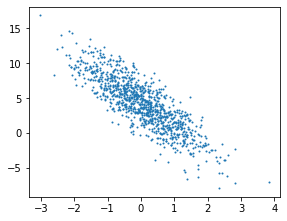

In [12]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(4.5,3.5)):
    use_svg_display
    #设置图的尺寸
    plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

## 读取数据
在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回`batch_size`（批量大小）个随机样本的特征和标签。

In [9]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size,feature,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i +  batch_size, num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

让我们读取第一个小批量数据样本并打印。每个批量的特征形状为（10，2）,分别对应批量大小和输入个数；标签形状为批量大小。

In [10]:
batch_size = 10

for X, y in data_iter(batch_size,features, labels):
    print(X, y)
    break

tensor([[ 1.3224,  0.0413],
        [ 0.9283,  1.3123],
        [-0.7958,  0.9116],
        [-1.3732, -1.9941],
        [-0.1482,  1.5283],
        [-1.1538,  1.0943],
        [ 0.8080,  1.0240],
        [ 1.3290, -1.5133],
        [ 1.5018,  0.1094],
        [-1.8629, -0.8236]], dtype=torch.float64) tensor([ 6.7076,  1.9306, -0.2517,  7.7161, -0.9029, -1.5393,  2.6032, 11.5947,
         6.8525,  3.0766], dtype=torch.float64)


0
10
20
30
40
50
60
70
80
90
